# 프로젝트 : SRGAN 활용

## Step 1. 직접 고른 이미지로 SRGAN 실험하기

#### 높은해상도 이미지 불러오기

(680, 1180, 3)


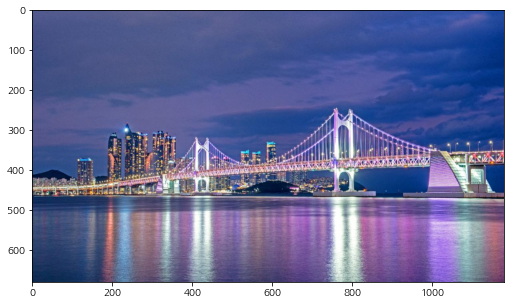

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

img_path = os.getenv('HOME')+'/aiffel/super_resolution/광안리.jpg' 
img_orig = cv2.imread(img_path) 
print (img_orig.shape)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))

In [2]:
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

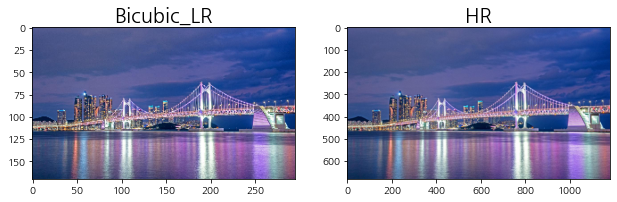

In [3]:
bicubic_image = cv2.resize(
    img_orig, 
    None,fx=0.25,fy=0.25, # (가로 픽셀 수, 세로 픽셀 수)
    # bicubic interpolation 적용
)

images = [bicubic_image, img_orig]
titles = ["Bicubic_LR", "HR"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

In [4]:
import tensorflow as tf

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

In [5]:
import tensorflow_datasets as tfds

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

lr = bicubic_image

srgan_hr = apply_srgan(lr)

In [6]:
lr.shape

(170, 295, 3)

In [7]:
# bicubic interpolation 활용 고해상도 변환

bicubic_hr = cv2.resize(
    bicubic_image, 
    None,fx=4,fy=4, # (가로 픽셀 수, 세로 픽셀 수)
    interpolation = cv2.INTER_CUBIC # bicubic interpolation 적용
)

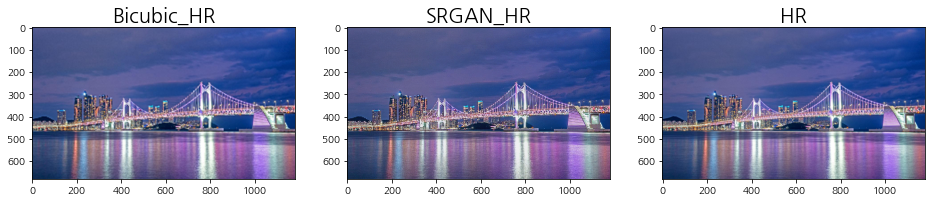

In [8]:
images = [bicubic_hr, srgan_hr, img_orig]
titles = ["Bicubic_HR", "SRGAN_HR", "HR"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

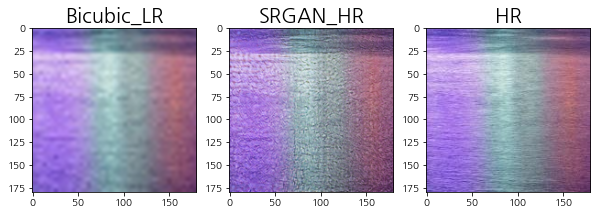

In [9]:
left_top = (500, 1000)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_srgan_hr = crop(srgan_hr, left_top)
crop_img_orig = crop(img_orig, left_top)

crop_images = [crop_bicubic_hr, crop_srgan_hr, crop_img_orig]
titles = ["Bicubic_LR", "SRGAN_HR", "HR"]

plt.figure(figsize=(10,20))

for i, (image, title) in enumerate(zip(crop_images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

In [10]:
print(crop_img_orig.shape)
print(crop_bicubic_hr.shape)
print(crop_srgan_hr.shape)

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)


In [11]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

print("**동일 이미지 비교**")
print("Bicubic_HR PSNR :", peak_signal_noise_ratio(img_orig, bicubic_hr))
print("Bicubic_HR SSIM :", structural_similarity(img_orig, bicubic_hr, multichannel=True))
print("SRGAN_HR PSNR :", peak_signal_noise_ratio(img_orig, srgan_hr))
print("SRGAN_HR SSIM :", structural_similarity(img_orig, srgan_hr, multichannel=True))
print("HR PSNR :", peak_signal_noise_ratio(img_orig, img_orig))
print("HR SSIM :", structural_similarity(img_orig, img_orig, multichannel=True))

**동일 이미지 비교**
Bicubic_HR PSNR : 23.765808653537
Bicubic_HR SSIM : 0.7804937773393738
SRGAN_HR PSNR : 20.381436451803943
SRGAN_HR SSIM : 0.523599633626641
HR PSNR : inf
/home/aiffel-dj31/anaconda3/envs/aiffel/lib/python3.7/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)
HR SSIM : 1.0


#### 저해상도 이미지 불러오기  


(218, 660, 3)


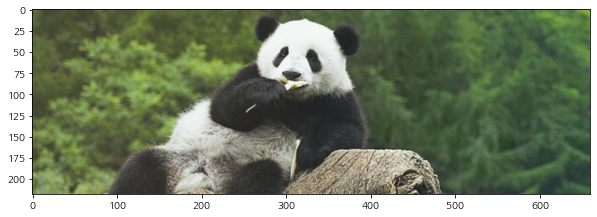

In [12]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

img_path = os.getenv('HOME')+'/aiffel/super_resolution/panda.jpg' 
img_orig = cv2.imread(img_path) 
print (img_orig.shape)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))

In [13]:
lr = img_orig

srgan_hr = apply_srgan(lr)

In [14]:
bicubic_hr = cv2.resize(
    img_orig, 
    None,fx=4,fy=4, # (가로 픽셀 수, 세로 픽셀 수)
    interpolation=cv2.INTER_CUBIC # bicubic interpolation 적용
)

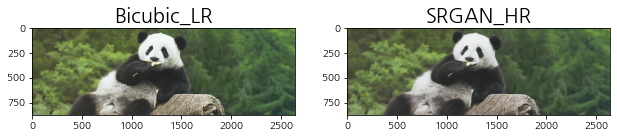

In [15]:
images = [bicubic_hr, srgan_hr]
titles = ["Bicubic_LR", "SRGAN_HR"]

plt.figure(figsize=(16,3))
for i, (image, title) in enumerate(zip(images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

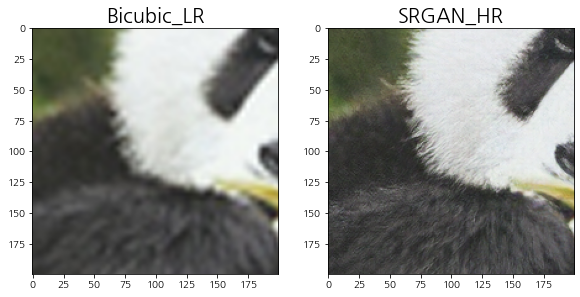

In [16]:
left_top = (200, 1000)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_srgan_hr = crop(srgan_hr, left_top)
crop_img_orig = crop(img_orig, left_top)

crop_images = [crop_bicubic_hr, crop_srgan_hr]
titles = ["Bicubic_LR", "SRGAN_HR"]

plt.figure(figsize=(15,25))
for i, (image, title) in enumerate(zip(crop_images, titles)):
    plt.subplot(1,3,i+1)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title, fontsize=20)

In [17]:
img_big = cv2.resize(img_orig, dsize = (2640, 872))

In [18]:
print(bicubic_hr.shape)
print(img_big.shape)
print(srgan_hr.shape)

(872, 2640, 3)
(872, 2640, 3)
(872, 2640, 3)


## Step 2. SRGAN을 이용해 고해상도 gif 생성하기

### Step 2-1. gif 이미지 불러오기 

In [19]:
import cv2

# 다운받은 파일의 경로를 설정해 주세요.
gif = cv2.VideoCapture("/home/aiffel-dj31/aiffel/super_resolution/wine_lr.gif") 

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 13
frame 크기 : (340, 355, 3)


### Step 2-2. 프레임별 Super Resolution 진행

In [20]:
frames_bi = []
frames_sr = []
for i in range(len(frames)) :
    bicubic_hr = cv2.resize(frames[i], dsize=(frames[i].shape[1]*4, frames[i].shape[0]*4), interpolation=cv2.INTER_CUBIC)
    srgan_hr = apply_srgan(frames[i])
    frames_bi.append(bicubic_hr)
    frames_sr.append(srgan_hr)
          
        
print("frame_bi 수 :", len(frames_bi))
print("frame_bi 크기 :", (frames_bi[0].shape))
print("frame_sr 수 :", len(frames_sr))
print("frame_sr 크기 :", (frames_sr[0].shape))

frame_bi 수 : 13
frame_bi 크기 : (1360, 1420, 3)
frame_sr 수 : 13
frame_sr 크기 : (1360, 1420, 3)


### Step 2-3. 프레임을 합쳐 gif 만들기

In [21]:
import imageio

imageio.mimsave("wine_sr.gif", frames_sr)
imageio.mimsave("wine_bi.gif", frames_bi)

### Step 2-4. Jupyter notebook에 gif표시하기

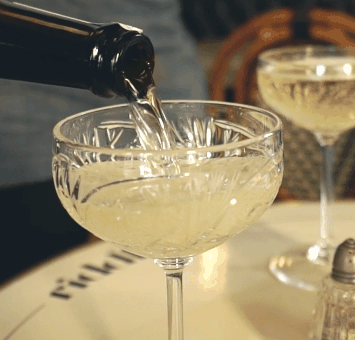

In [22]:
from IPython.display import Image as show_gif

show_gif("/home/aiffel-dj31/aiffel/super_resolution/wine_lr.gif", width=1000) # 원본

In [1]:
#show_gif("/home/aiffel-dj31/aiffel/super_resolution/wine_bi.gif", width=1000) #Bicubic

In [2]:
#show_gif("/home/aiffel-dj31/aiffel/super_resolution/wine_sr.gif", width=1000) #SRGAN

!https://github.com/zoohoney/workplace/blob/master/wine_bi.gif

# 프로젝트를 마치며 

### 이미지 처리 하는 부분을 더 자세히 알게 된 계기가 되었다. 이미지 사이즈 규격 및 크롭 gif만들기등 전 익스노드에서는 재대로 해보지 못했는데 이번 실습으로 조금 더 자세히 알게 되었다. 다음번에는 옛날 나의 사진으로 한번 해봐야겠다. 